<a href="https://colab.research.google.com/github/Chitralekha-Hassan/Stock-Market-Price-Prediction/blob/main/Stock_Market_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Here we use Artificial Neural Network called LSTM(Long Short-Term Memory)
  We will be predicting the trends of stock prices using machine learning architecture of LSTM while also making use of prominent Python Libraries such as Tensorflow, Keras, etc

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning (DL). Unlike standard feedforward neural networks, LSTM has feedback connections.

In [8]:
# Importing libraries
import numpy as np                  # we can apply mathematical functions for multi dimensional arrays
import matplotlib.pyplot as plt     # used for visualisation
import pandas as pd                 # data analysis and maipulation tool
import datetime                     

In [49]:
data = pd.read_csv('/content/Google_Stock_Price_Train.csv')
data.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [51]:
data.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

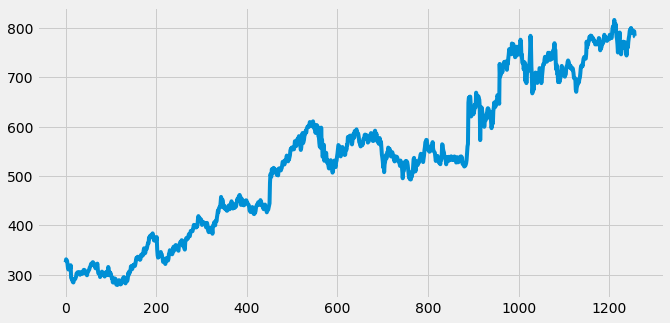

In [52]:
data['Open'].plot(figsize=(10,5))

In [54]:
data['Close'] = data['Close'].str.replace(',', '').astype(float)

In [55]:
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)

In [56]:
# 7 day rolling mean
data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,323.002857,325.392857,318.682857,643.132857,7.208100e+06
7,321.457143,322.882857,316.841429,638.037143,6.691514e+06
8,318.698571,319.801429,314.025714,631.870000,6.531857e+06
9,316.552857,317.524286,311.851429,627.534286,6.137929e+06


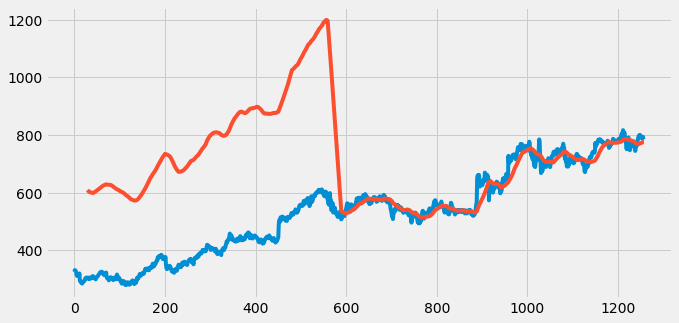

In [59]:
data['Open'].plot(figsize=(10,5))
data.rolling(window=30).mean()['Close'].plot()

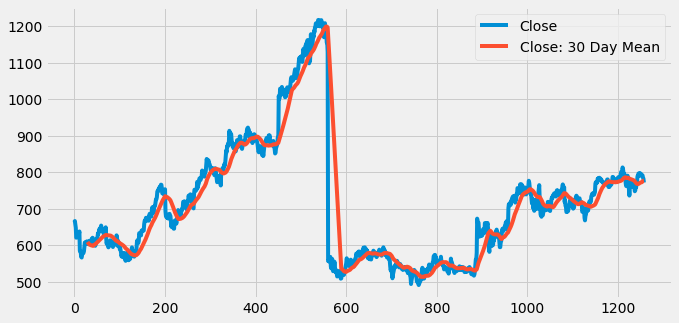

In [61]:
data['Close: 30 Day Mean'] = data['Close'].rolling(window=30).mean()
data[['Close','Close: 30 Day Mean']].plot(figsize=(10,5))

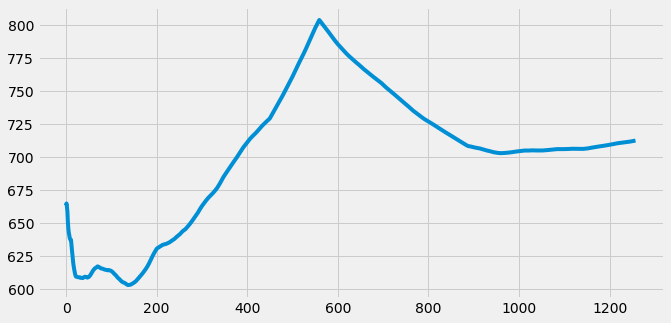

In [62]:
# Optional specify a min number of periods
data['Close'].expanding(min_periods=1).mean().plot(figsize=(10,5))

In [63]:
training_set=data['Open']
training_set=pd.DataFrame(training_set)

In [68]:
# Data cleaning
data.isna().any()

Date                  False
Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [69]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set) 

In [71]:
# Creating a data structure with 60 timestamps and 1 output
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

KERAS

Keras is Tensor Flow's high level API for uilding and training deep learning models 

Sequential

A linear stack of layers through which you can create a sequential model by passing a list through it

Dense

Regular deeply connected neural network layer its the most commonly used one and used to change the dimension of output vector




In [72]:
# Building the RNN (Recurrent Neural Network) 

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 
from keras.layers import Dropout

In [73]:
# Initialising the RNN
regressor = Sequential()

Dropuout is a regularisation technique used to reduce overfitting in neural networks

Dropouts are used in making the neurons more robust and hence allowing them to predict the trend without focusing on any one neuron



In [74]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units =1))

Optimizer is one of the two arguments that is required to compile the RNN model

The type of Optimizer used can greatly affect how fast the algorithm converges to the minimum value.
Here we use Adam optimizer. 
This 'Adam' optimizer combines the perks of two other optimizers
AUAgrad
RMSprop

ADAM (Adaptive Movement Estimation) is another method that computes the adaptive learning rates for each parameter based on its past gradients


Regularisation
Another important aspect of training the model is making sure the weights do not get too large, Hence overfit. 
For this purpose we have chosen to use Tikhonov regularisation


EPOCH

It is a frame of time in machine learning, the number of passes the ML algorithm has completed

In [77]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs= 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 124ms/step - loss: 0.0055
Epoch 2/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0047
Epoch 3/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0039
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0045
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0037
Epoch 6/100
38/38 [==============================] - 6s 161ms/step - loss: 0.0035
Epoch 7/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0038
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0034
Epoch 9/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0034
Epoch 11/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0032
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0029
Epoch 13/100

Visualization

A rolling analysis of atime series model is often used to assess the model's stability over time. 
When analyzing financial time series data using a statistical model, a key assumption is that the parameters of the model are constant over time.

In [80]:
# Making the predictions and visualising the results

# Getting the real stock price of 2017

data_test = pd.read_csv('/content/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

ILOC

To select rows and columns by number inorder that they apppear in the dataframe
and it allows selection based on these numbers

In [82]:
real_stock_price = data_test.iloc[:, 1:2].values

In [83]:
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-13,778.81,789.63,775.80,786.14,"16,57,300"
2017-01-17,788.36,791.34,783.16,786.90,"10,73,000"
2017-01-18,786.08,794.48,785.02,794.02,"13,35,200"
2017-01-19,795.26,807.90,792.20,806.15,"16,40,200"
2017-01-20,806.40,809.97,802.83,806.65,"12,72,400"


In [84]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-13 to NaT
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [85]:
data_test["Volume"] = data_test["Volume"].str.replace(',', '').astype(float)

In [87]:
from pandas.core.frame import DataFrame
test_set=data_test['Open']
test_set=pd.DataFrame(test_set)

In [88]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-13 to NaT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [94]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []

for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [95]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


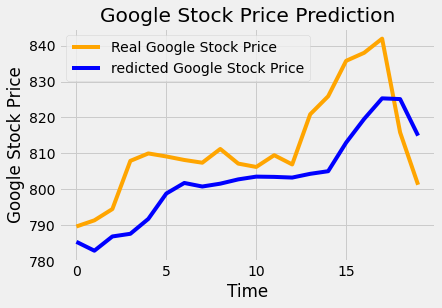

In [96]:
# Visualising the results
plt.plot(real_stock_price, color = 'orange', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'redicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Conclusion

Here we have compared the Real stock price vs Predicted Stock prices.
We have used Matplotlib to visualise the results.
From the plot the real stock price went up while our model predicted the same. 
This clearly shows how powerful LSTM's are for analysing time series and sequential data. 
The analysis has been implemented by the use of Keras API.
Also the Stock market is growing rapidly which is encouraging to indulge in research. 
Here we have used most powerful techniques such as LSTM and RNN which helps investors or anyone interested inorder to predict Stock indices and forecast stock market trends with utmost accuracy using precise Ml models.


